## Stochastic SIR model wil scaled noise and metapopulations


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def build_sir(beta, gamma, rho):
    def calc_next_sir_timestep(t, populations):
        populations = populations.reshape((-1,3))
        
        lambda_ = beta * np.sum(rho * populations[:,1], axis=1) / np.sum(populations, axis=1)
        infection_rate = lambda_ * populations[:,0]
        infection_rate += np.sqrt(infection_rate) * np.random.normal(0, 1, len(infection_rate))
        
        recovery_rate = gamma * populations[:,1] 
        recovery_rate += np.sqrt(recovery_rate) * np.random.normal(0, 1, len(recovery_rate))
        
        infection_rate = np.clip(infection_rate, 0, None)
        recovery_rate = np.clip(recovery_rate, 0, None)
        
        return np.array([
            - infection_rate,
            infection_rate - recovery_rate,
            recovery_rate
        ]).T.flatten()
    return calc_next_sir_timestep


/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


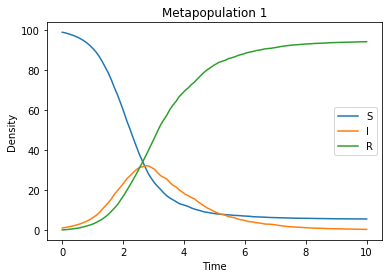

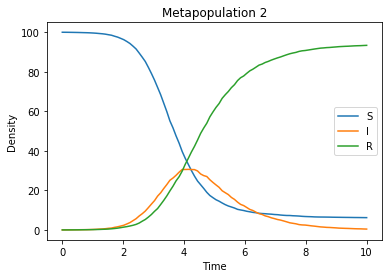

In [18]:
v_beta = 3
v_gamma = 1
v_rho=np.array([[1, 0.01], [0.01, 1]])
initial_condition = np.array([[99, 1, 0], [100, 0, 0]])
time = 10
steps = 100

result = solve_ivp(
    fun=build_sir(beta=v_beta, gamma=v_gamma, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = result.y.reshape((-1,3,steps))

for i, pop in enumerate(results):
    plt.figure()
    plt.plot(result.t, pop.T)
    plt.title(f'Metapopulation {i+1}')
    plt.legend(['S', 'I', 'R'])
    plt.xlabel('Time')
    plt.ylabel('Density')

plt.show()


/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


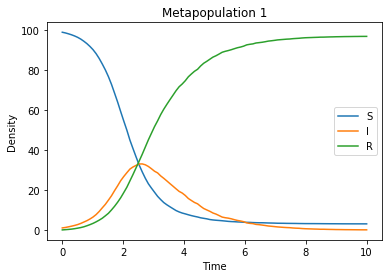

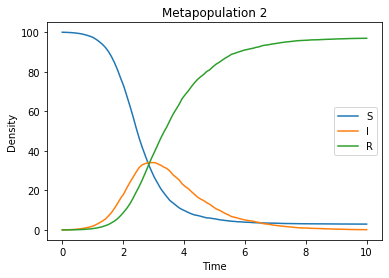

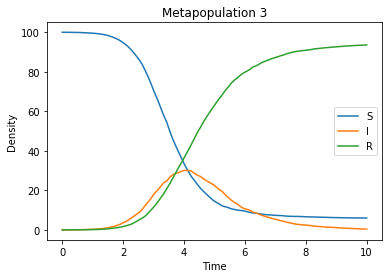

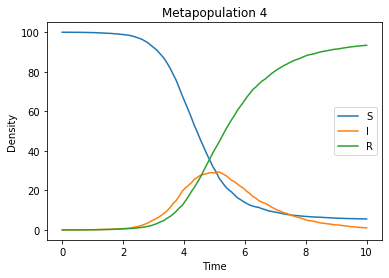

In [9]:
v_beta = np.array([3, 3, 3, 3])
v_gamma=np.array([1, 1, 1, 1])
v_rho=np.array([[1, 0.1, 0.01, 0.001], [0.1, 1, 0, 0], [0.01, 0, 1, 0], [0.001, 0, 0, 1]])
initial_condition = np.array([[99, 1, 0], [100, 0, 0], [100, 0, 0], [100, 0, 0]])
time = 10
steps = 100

result = solve_ivp(
    fun=build_sir(beta=v_beta, gamma=v_gamma, rho=v_rho), 
    t_span=(0, time),
    t_eval=np.linspace(0, time, steps),
    y0=initial_condition.flatten()
)
results = result.y.reshape((-1,3,steps))

for i, pop in enumerate(results):
    plt.figure()
    plt.plot(result.t, pop.T)
    plt.title(f'Metapopulation {i+1}')
    plt.legend(['S', 'I', 'R'])
    plt.xlabel('Time')
    plt.ylabel('Density')

plt.show()